# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [3]:
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


## Step 2

In [26]:
#Create a value for home wins

EPL18['hwinvalue']=np.where(EPL18['FTR']=='H',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['awinvalue']=np.where(EPL18['FTR']=='A',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['count']=1

## Step 3

In [27]:
Half1=EPL18[EPL18.Date < 20180000]
Half2=EPL18[EPL18.Date > 20180000]
Half1.describe()
Half2.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.0
mean,2.018030e+07,1.602339,1.105263,0.599415,0.400585,1.0
std,1.400601e+02,1.312741,1.051904,0.422248,0.422248,0.0
min,2.018010e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.018020e+07,1.000000,0.000000,0.000000,0.000000,1.0
50%,2.018031e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.018042e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.018051e+07,5.000000,4.000000,1.000000,1.000000,1.0


## Step 4 (home team)

In [98]:
Half1home=Half1.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Half1home=Half1home.rename(columns={'HomeTeam':'team', 'count':'Ph', 'hwinvalue':'hwinvalue1', 'FTHG':'FTHGf', 'FTAG':'FTAGa'})

Half1home

,team,Ph,hwinvalue1,FTHGf,FTAGa
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


## Step 5 (home team)

In [103]:
Half2home=Half2.groupby('HomeTeam')['count', 'hwinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Half2home=Half2home.rename(columns={'HomeTeam':'team','count':'Ph2', 'hwinvalue':'hwinvalue2', 'FTHG':'FTHGf2', 'FTAG':'FTAGa2'})

Half2home

,team,Ph2,hwinvalue2,FTHGf2,FTAGa2
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


## Step 6 (home team)

## Optional steps, not required for Assessment 
### (Uncomment to run)

In [ ]:
# Plot the data

#sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [ ]:
# Run the regression

#pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
#pyth_lm.summary()

## Step 7 (=Step 4 (away team))

In [104]:
Half1away=Half1.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Half1away=Half1away.rename(columns={'AwayTeam':'team','count':'Pa','awinvalue':'awinvalue1', 'FTHG':'FTHGa', 'FTAG':'FTAGf'})

Half1away

,team,Pa,awinvalue1,FTHGa,FTAGf
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 7 (=Step 5 (away team))

In [105]:
Half2away=Half2.groupby('AwayTeam')['count', 'awinvalue', 'FTHG', 'FTAG'].sum().reset_index()
Half2away=Half2away.rename(columns={'AwayTeam':'team', 'count':'Pa2', 'awinvalue':'awinvalue2', 'FTHG':'FTHGa2', 'FTAG':'FTAGf2'})

Half2away

,team,Pa2,awinvalue2,FTHGa2,FTAGf2
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


## Step 7 (=Step 6 (away team))

## Optional steps, not required for Assessment
### (Uncomment to run)

In [ ]:
# Plot the data

#sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [112]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc2 ~ pyth', data=Half2predict).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wpc2   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     31.06
Date:                Sat, 07 May 2022   Prob (F-statistic):           2.73e-05
Time:                        21:00:46   Log-Likelihood:                 19.534
No. Observations:                  20   AIC:                            -35.07
Df Residuals:                      18   BIC:                            -33.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2897      0.043      6.690      0.000       0.199       0.381
pyth           0.4543      0.082      5.573      0.000       0.283       0.626
==============================================================================
Omnibus:                        4.877   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                1.521
Skew:                          -0.033   Prob(JB):                        0.467
Kurtosis:                       1.650   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [99]:
Half1full=pd.merge(Half1home, Half1away, on = ['team'])


In [100]:
Half1full['W'] = Half1full['hwinvalue1']+Half1full['awinvalue1']
Half1full['G'] = Half1full['Ph']+Half1full['Pa']
Half1full['GF'] = Half1full['FTHGf']+Half1full['FTAGf']
Half1full['GA'] = Half1full['FTAGa']+Half1full['FTHGa']
Half1full

,team,Ph,hwinvalue1,FTHGf,FTAGa,Pa,awinvalue1,FTHGa,FTAGf,W,G,GF,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


In [101]:
Half1full['wpc'] = Half1full['W']/Half1full['G']
Half1full['pyth'] = Half1full['GF']**2/(Half1full['GF']**2 + Half1full['GA']**2)
Half1full

,team,Ph,hwinvalue1,FTHGf,FTAGa,Pa,awinvalue1,FTHGa,FTAGf,W,G,GF,GA,wpc,pyth
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


## Step 9

In [106]:
Half2full=pd.merge(Half2home, Half2away, on = ['team'])
Half2full

,team,Ph2,hwinvalue2,FTHGf2,FTAGa2,Pa2,awinvalue2,FTHGa2,FTAGf2
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


In [107]:
Half2full['W2'] = Half2full['hwinvalue2']+Half2full['awinvalue2']
Half2full['G2'] = Half2full['Ph2']+Half2full['Pa2']
Half2full['GF2'] = Half2full['FTHGf2']+Half2full['FTAGf2']
Half2full['GA2'] = Half2full['FTAGa2']+Half2full['FTHGa2']
Half2full

,team,Ph2,hwinvalue2,FTHGf2,FTAGa2,Pa2,awinvalue2,FTHGa2,FTAGf2,W2,G2,GF2,GA2
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14


In [108]:
Half2full['wpc2'] = Half2full['W2']/Half2full['G2']
Half2full['pyth2'] = Half2full['GF2']**2/(Half2full['GF2']**2 + Half2full['GA2']**2)
Half2full

,team,Ph2,hwinvalue2,FTHGf2,FTAGa2,Pa2,awinvalue2,FTHGa2,FTAGf2,W2,G2,GF2,GA2,wpc2,pyth2
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


In [109]:
Half2predict=pd.merge(Half1full, Half2full, on=['team'])
Half2predict

,team,Ph,hwinvalue1,FTHGf,FTAGa,Pa,awinvalue1,FTHGa,FTAGf,W,...,Pa2,awinvalue2,FTHGa2,FTAGf2,W2,G2,GF2,GA2,wpc2,pyth2
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,...,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,...,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,...,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,...,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,...,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,...,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,...,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,...,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,...,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,...,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment
### (Uncomment to run)

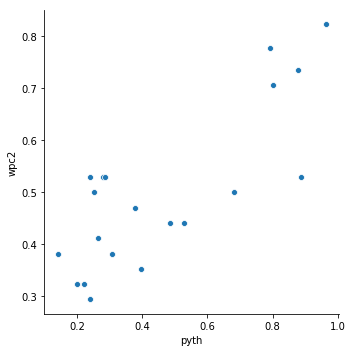

In [110]:
sns.relplot(x="pyth", y="wpc2", data =Half2predict)

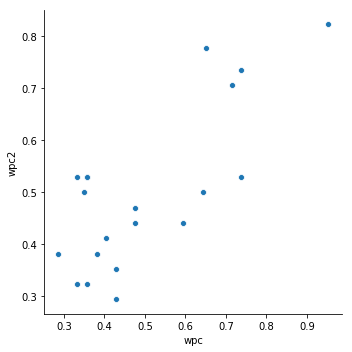

In [111]:
sns.relplot(x="wpc", y="wpc2", data =Half2predict)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?